# 01/08/2022 Monday

In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv("bollywood.csv")

**1.No of rows  &  Metadata**

In [3]:
print(len(data))
#meta data
print(data.info())

149
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SlNo                 149 non-null    int64  
 1   Release Date         149 non-null    object 
 2   MovieName            149 non-null    object 
 3   ReleaseTime          149 non-null    object 
 4   Genre                149 non-null    object 
 5   Budget               149 non-null    int64  
 6   BoxOfficeCollection  149 non-null    float64
 7   YoutubeViews         149 non-null    int64  
 8   YoutubeLikes         149 non-null    int64  
 9   YoutubeDislikes      149 non-null    int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 11.8+ KB
None


**2.How many movies got released in each genre? Which genre had highest number of releases? Sort
number of releases in each genre in descending order**

In [4]:
k=data["Genre"].value_counts()
print(k)

Comedy       36
 Drama       35
Thriller     26
Romance      25
Action       21
Action        3
Thriller      3
Name: Genre, dtype: int64


In [5]:
type(k)

pandas.core.series.Series

In [6]:
k[k==data["Genre"].value_counts().max()]

Comedy    36
Name: Genre, dtype: int64

comedy has highest no of relases

**3.How many movies in each genre got released in different release times like long weekend, festive
season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.)**

In [7]:
pd.crosstab(index=data["Genre"],columns=data["ReleaseTime"])

ReleaseTime,FS,HS,LW,N
Genre,,,,
Drama,4,6,1,24
Action,3,3,3,12
Action,0,0,0,3
Comedy,3,5,5,23
Romance,3,3,4,15
Thriller,4,1,1,20
Thriller,0,0,1,2


**4.Which month of the year, maximum number movie releases are seen? (Note: Extract a new column
called month from ReleaseDate column.)**

In [8]:
data.head()

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
0,1,18-Apr-14,2 States,LW,Romance,36,104.00,8576361,26622,2527
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
2,3,18-Jul-14,Amit Sahni Ki List,N,Comedy,10,4.00,572336,586,54
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19
4,5,4-Jul-14,Bobby Jasoos,N,Comedy,18,10.80,3113427,4512,1224


*extracting month from Release date*

In [9]:
l=[]
for i in range(len(data["Release Date"])):
    l.append(data.loc[i,"Release Date"][-6:-3])
data["month"]=l


In [11]:
k=data["month"].value_counts()

In [12]:
k[k==k.max()]  #k is series object we can extract max values by subsetting in this way

Jan    20
Name: month, dtype: int64

* Jan month has highest no of releases

**5.Which month of the year typically sees most releases of high budgeted movies, that is, movies with
budget of 25 crore or more?**

In [27]:
k=pd.crosstab(index=data["month"],columns=data[data["Budget"]>=25]["Budget"],margins=True)
print(k)

Budget  25  26  27  28  29  30  31  32  33  35  ...  75  85  90  100  115  \
month                                           ...                         
Apr      0   0   0   0   1   0   1   0   0   0  ...   0   0   0    0    0   
Aug      0   0   0   0   0   0   0   0   0   2  ...   1   0   1    1    0   
Dec      0   0   0   0   0   0   0   0   0   0  ...   0   1   1    0    0   
Feb      0   0   1   0   0   2   0   0   0   0  ...   0   0   0    0    0   
Jan      2   0   0   0   0   0   1   0   1   0  ...   0   0   0    0    0   
Jul      0   0   1   0   0   3   0   0   0   1  ...   0   0   0    1    0   
Jun      0   0   0   0   0   1   0   0   0   2  ...   1   0   0    0    0   
Mar      1   1   1   1   0   1   0   1   0   0  ...   0   0   0    0    0   
May      0   0   0   0   0   0   0   0   0   0  ...   0   0   0    0    0   
Nov      0   0   0   0   0   1   0   0   0   2  ...   0   0   0    0    1   
Oct      0   0   0   0   0   0   0   0   0   0  ...   0   1   0    0    0   

In [28]:
k=k[["All"]]                            #taking only "all" column from k which is summation of no of movies above 25 cr
k.drop(["All"],axis=0,inplace=True)    #dropping last row all since it doesnt required and effect while finding max valued month

In [29]:
k[k["All"]==k["All"].max()]

Budget,All
month,
Feb,9


* February has highest budget movies

**6.Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on
investment (ROI) as (BoxOfficeCollection – Budget) / Budget**

In [30]:
data["ROI"]=(data["BoxOfficeCollection"]-data["Budget"])/data["Budget"]

In [31]:
k=data["ROI"]

In [32]:
k

0      1.888889
1      0.200000
2     -0.600000
3     -0.950000
4     -0.400000
         ...   
144    1.000000
145    1.469231
146   -0.625000
147    1.378000
148   -0.200000
Name: ROI, Length: 149, dtype: float64

In [33]:
m=k.sort_values()[-9:]

In [34]:
m

101    4.466667
37     5.500000
128    5.666667
58     5.933333
87     6.240000
135    7.500000
132    7.514286
89     7.647059
64     8.166667
Name: ROI, dtype: float64

In [35]:
j=m.index

In [36]:
for i in j:
    print(data.loc[i,"MovieName"])

Bhaag Milkha Bhaag
Humpty Sharma Ki Dulhania
Shahid
Mary Kom
Fukrey
The Lunchbox
Grand Masti
PK
Aashiqui 2


**7.Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate
the average ROI for different release times**

In [42]:
data["ReleaseTime"].unique()

array(['LW', 'N', 'HS', 'FS'], dtype=object)

In [41]:
data[data["ReleaseTime"]=="FS"]["ROI"].mean()
    

0.9738532013595953

In [43]:
  data[data["ReleaseTime"]=="LW"]["ROI"].mean()   

1.1272053098737973

In [44]:
  data[data["ReleaseTime"]=="HS"]["ROI"].mean()   

0.8508667840873724

In [45]:
  data[data["ReleaseTime"]=="N"]["ROI"].mean()   

0.6577216305350877

* *from the values of means of different ReleaseTime ROI's
we can conclude that Long weekend and Festival Season could generate higher ROI values*


**8.Draw a histogram and a distribution plot to find out the distribution of movie budgets. Interpret the
plot to conclude if the most movies are high or low budgeted movies**

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([64., 40., 19., 11.,  4.,  4.,  2.,  2.,  1.,  2.]),
 array([  2. ,  16.8,  31.6,  46.4,  61.2,  76. ,  90.8, 105.6, 120.4,
        135.2, 150. ]),
 <a list of 10 Patch objects>)

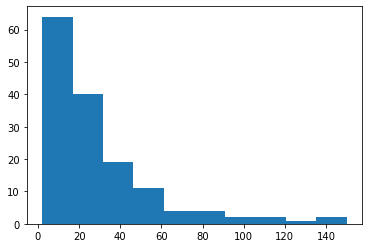

In [47]:
plt.hist(data["Budget"])

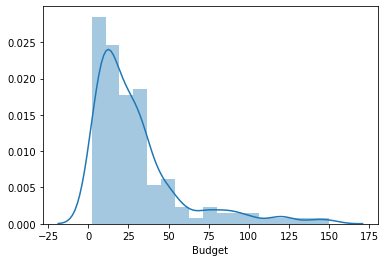

In [48]:
sns.distplot(data["Budget"])

* *Most movies are less than or equal to 20 Crore Budget*

**9.Compare the distribution of ROIs between movies with comedy genre and drama. Which genre
typically sees higher ROIs?**


In [53]:
data["Genre"].unique()

array(['Romance', 'Thriller ', 'Comedy', ' Drama ', 'Action ', 'Action',
       'Thriller'], dtype=object)

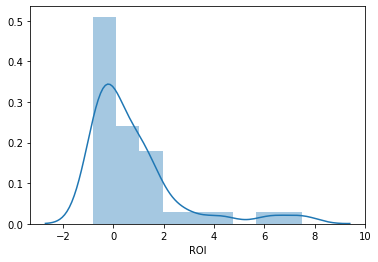

In [56]:
sns.distplot(data[data["Genre"]=="Comedy"]["ROI"])

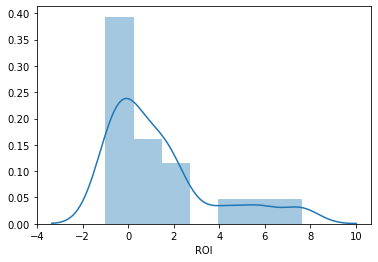

In [61]:
sns.distplot(data[data["Genre"]==" Drama "]["ROI"])

*Drama has higher ROI*

**10.Is there a correlation between box office collection and YouTube likes? Is the correlation positive or
negative?**

In [66]:
data["BoxOfficeCollection"].corr(data["YoutubeLikes"])

0.6825165877731297

* The correlation is 0.68 which is the good indicator to show relationship between YouTubeLikes and BoxOfficeCollection and it is positively correlated

__11.Which genre of movies typically sees more YouTube likes? Draw boxplots for each genre of movies
to compare.__

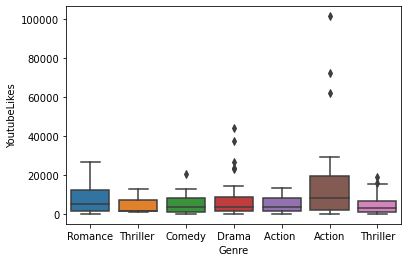

In [68]:
sns.boxplot(data=data, x='Genre', y='YoutubeLikes')

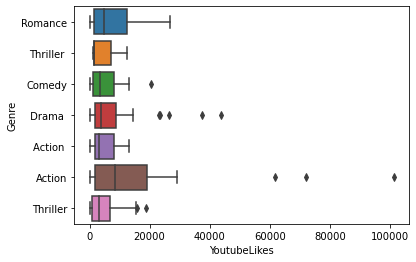

In [70]:
sns.boxplot(data=data, y='Genre', x='YoutubeLikes')

*actions movies have typically more youtube likes*

**12.Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes,
YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap.**

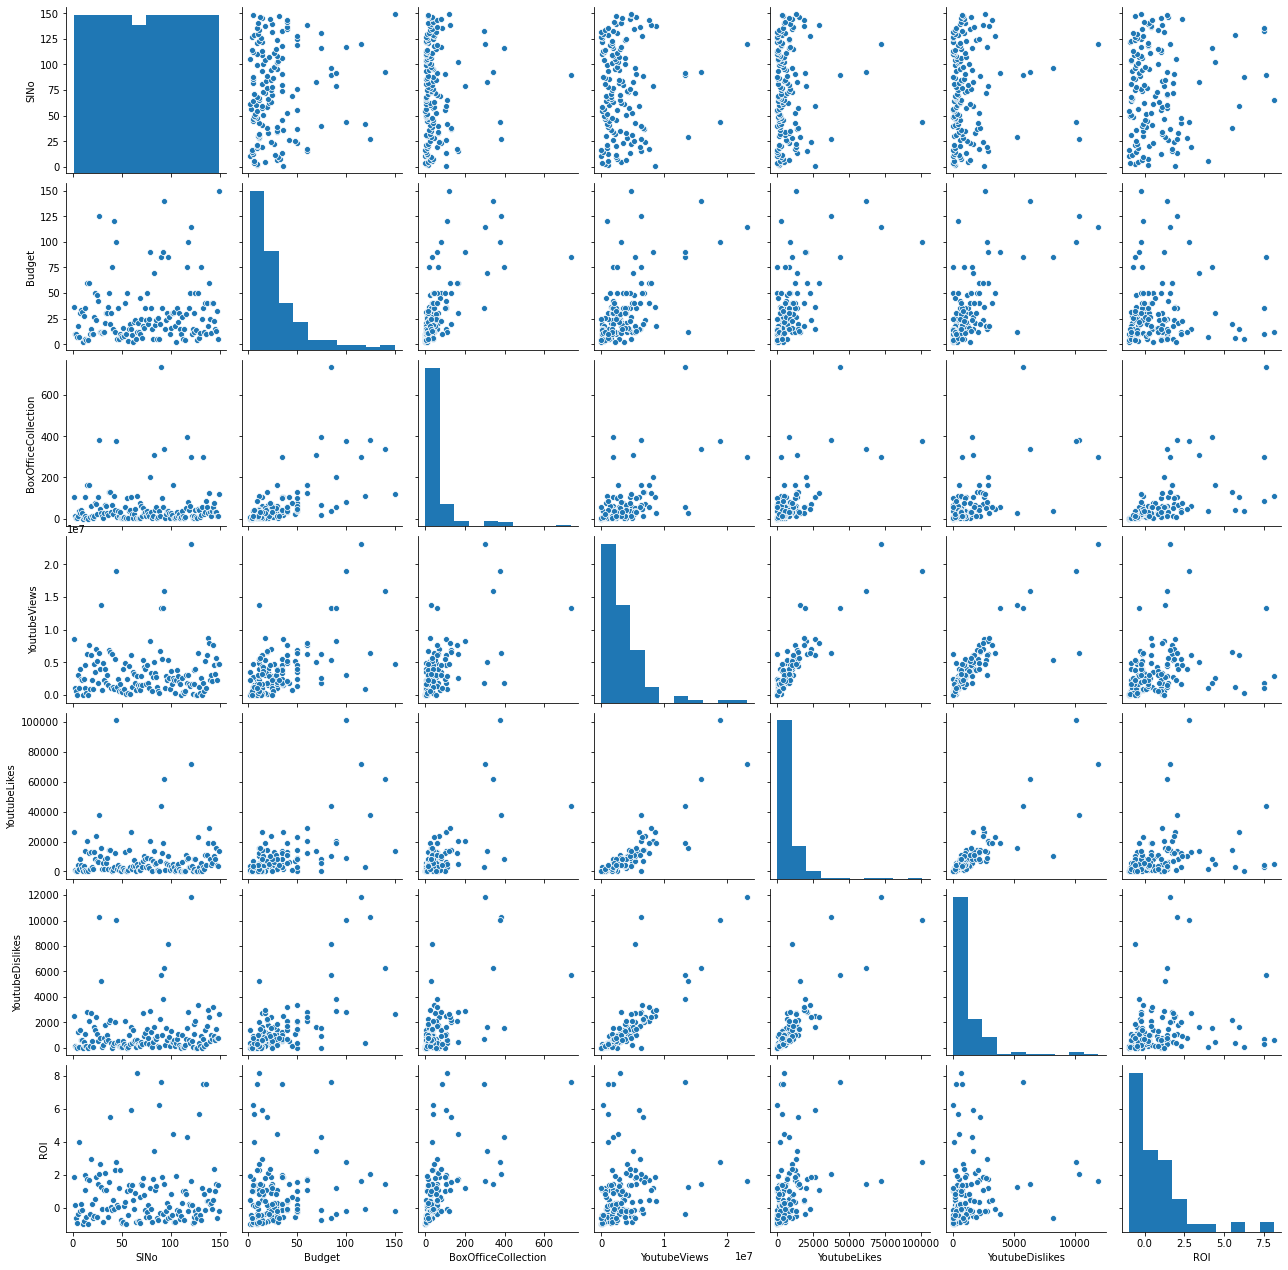

In [71]:
sns.pairplot(data)

In [73]:
data.corr()

,SlNo,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,ROI
SlNo,1.000000,0.116899,0.036908,0.025027,0.018163,0.035949,0.037314
Budget,0.116899,1.000000,0.650401,0.589038,0.608916,0.665343,0.072050
BoxOfficeCollection,0.036908,0.650401,1.000000,0.588632,0.682517,0.623941,0.585042
YoutubeViews,0.025027,0.589038,0.588632,1.000000,0.884055,0.846739,0.252847
YoutubeLikes,0.018163,0.608916,0.682517,0.884055,1.000000,0.859730,0.291302
YoutubeDislikes,0.035949,0.665343,0.623941,0.846739,0.859730,1.000000,0.201533
ROI,0.037314,0.072050,0.585042,0.252847,0.291302,0.201533,1.000000


* Youtube views and youtube likes are highly correlated